In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
data=pd.read_csv("D:/bri-data-hackathon-pa/train.csv")

# Eksplorasi dan PreProcess

In [3]:
data.describe(include="all")

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,11153,11153.000000,11153,11153.000000,11153.000000,11153,11153.000000,11153.000000,11153,11153.000000,...,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11152.000000,11152.000000,11153.000000
unique,3,NaN,8,NaN,NaN,3,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,JG04,NaN,PG03,NaN,NaN,RM_type_A,NaN,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10413,NaN,9655,NaN,NaN,7287,NaN,NaN,9501,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.433208,NaN,1.349218,1.034646,NaN,1.735587,1985.837084,NaN,0.995517,...,2009.174124,6.277952,3.720165,3.505694,1.202726,3.664216,1.100152,72.234902,0.679071,0.146777
std,NaN,0.431086,NaN,0.324660,0.416723,NaN,0.441040,4.632214,NaN,0.881103,...,4.117162,5.033553,2.399068,1.818028,2.575138,2.652648,2.714525,23.030421,1.107381,0.353899
min,NaN,0.000000,NaN,0.000000,0.000000,NaN,1.000000,1963.000000,NaN,0.000000,...,1982.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,NaN,1.224745,NaN,1.224745,0.707107,NaN,1.000000,1985.000000,NaN,0.000000,...,2008.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,NaN,1.352775,NaN,1.352775,1.118034,NaN,2.000000,1987.000000,NaN,1.000000,...,2010.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000
75%,NaN,1.414214,NaN,1.385641,1.224745,NaN,2.000000,1989.000000,NaN,2.000000,...,2012.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000


In [4]:
data.shape

(11153, 22)

In [5]:
data.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

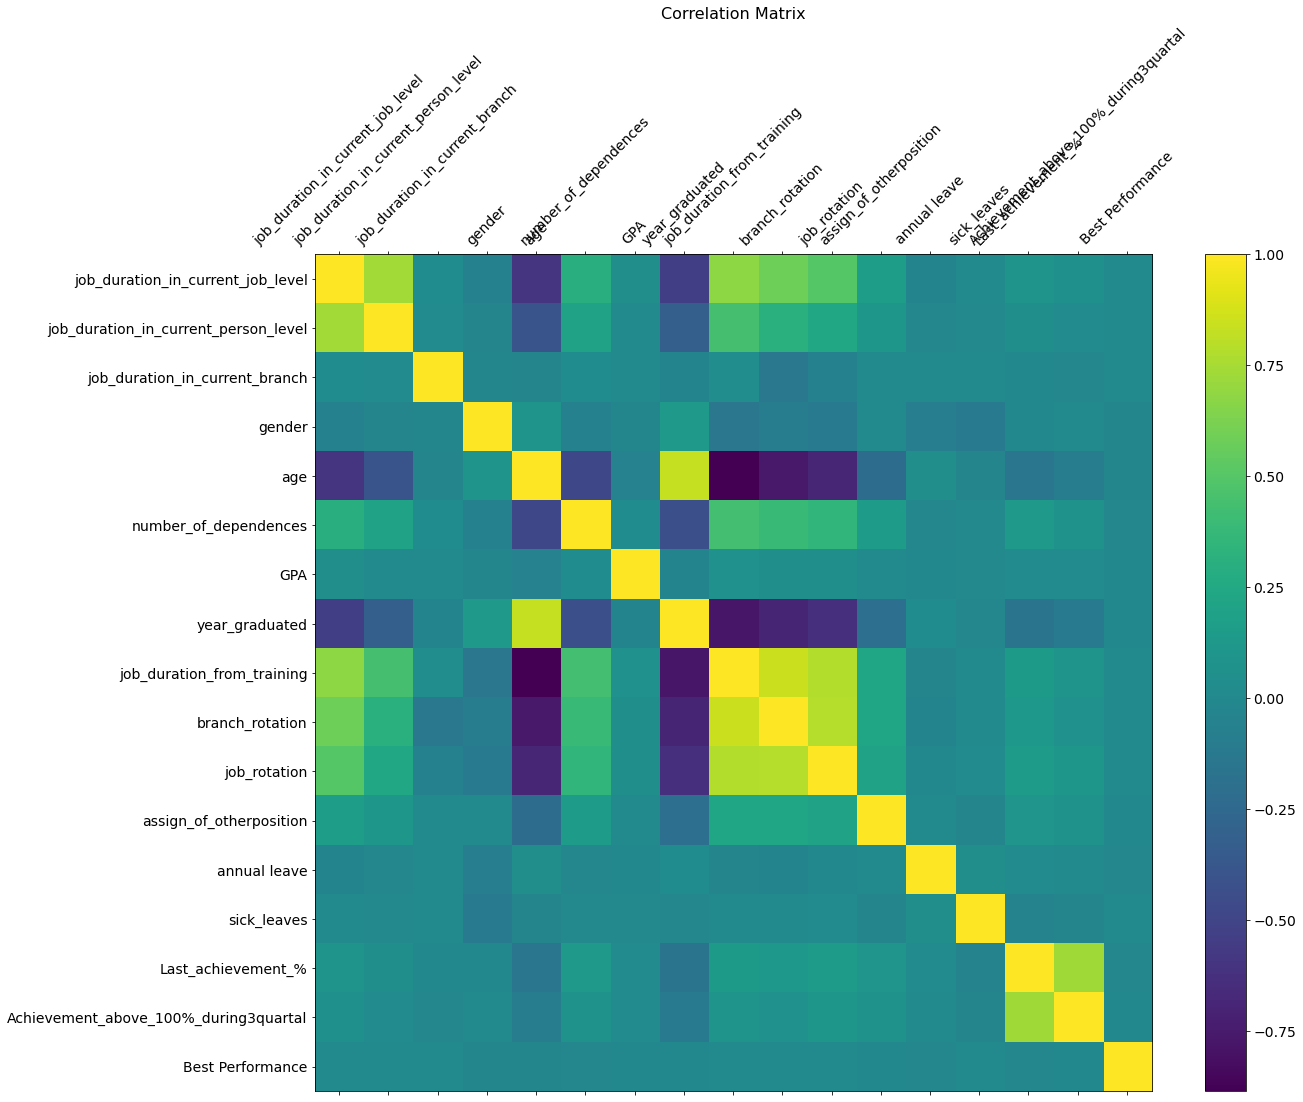

In [8]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [9]:
data=data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11152 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11152 non-null  object 
 1   job_duration_in_current_job_level      11152 non-null  float64
 2   person_level                           11152 non-null  object 
 3   job_duration_in_current_person_level   11152 non-null  float64
 4   job_duration_in_current_branch         11152 non-null  float64
 5   Employee_type                          11152 non-null  object 
 6   gender                                 11152 non-null  int64  
 7   age                                    11152 non-null  int64  
 8   marital_status_maried(Y/N)             11152 non-null  object 
 9   number_of_dependences                  11152 non-null  int64  
 10  Education_level                        11152 non-null  object 
 11  GP

In [11]:
data["Best Performance"].value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

In [12]:
data.groupby(['job_level'])['Best Performance'].value_counts(normalize=True)

job_level  Best Performance
JG03       0                   0.777778
           1                   0.222222
JG04       0                   0.853726
           1                   0.146274
JG05       0                   0.849432
           1                   0.150568
Name: Best Performance, dtype: float64

In [13]:
data.groupby(['person_level'])['Best Performance'].value_counts(normalize=True)

person_level  Best Performance
PG01          0                   0.736842
              1                   0.263158
PG02          0                   0.812500
              1                   0.187500
PG03          0                   0.852704
              1                   0.147296
PG04          0                   0.866579
              1                   0.133421
PG05          0                   0.896104
              1                   0.103896
PG06          0                   0.812169
              1                   0.187831
PG07          0                   0.894737
              1                   0.105263
PG08          1                   1.000000
Name: Best Performance, dtype: float64

In [14]:
data.groupby(['Employee_type'])['Best Performance'].value_counts(normalize=True)

Employee_type  Best Performance
RM_type_A      0                   0.858633
               1                   0.141367
RM_type_B      0                   0.840828
               1                   0.159172
RM_type_C      0                   0.858025
               1                   0.141975
Name: Best Performance, dtype: float64

In [15]:
data.groupby(['marital_status_maried(Y/N)'])['Best Performance'].value_counts(normalize=True)

marital_status_maried(Y/N)  Best Performance
N                           0                   0.842520
                            1                   0.157480
Y                           0                   0.855068
                            1                   0.144932
Name: Best Performance, dtype: float64

In [16]:
data.groupby(['Education_level'])['Best Performance'].value_counts(normalize=True)

Education_level  Best Performance
level_0          0                   1.000000
level_1          0                   0.807143
                 1                   0.192857
level_2          0                   1.000000
level_3          0                   0.849598
                 1                   0.150402
level_4          0                   0.854478
                 1                   0.145522
level_5          0                   0.860465
                 1                   0.139535
Name: Best Performance, dtype: float64

# Membuat variabel kategorik menjadi angka

In [17]:
data = pd.concat([data,pd.get_dummies(data['Education_level']),
                     pd.get_dummies(data['Employee_type']),
                     pd.get_dummies(data['marital_status_maried(Y/N)']),
                     pd.get_dummies(data['person_level']),
                     pd.get_dummies(data['job_level'])], axis=1)
data.drop(['Education_level','Employee_type','marital_status_maried(Y/N)','person_level','job_level'], axis = 1,inplace=True)
data.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,...,PG02,PG03,PG04,PG05,PG06,PG07,PG08,JG03,JG04,JG05
0,1.352775,1.352775,1.732051,2,1985,1,2.86,2011,4,2,...,0,1,0,0,0,0,0,0,1,0
1,1.292285,1.292285,1.039230,2,1989,0,7.28,2007,4,4,...,0,1,0,0,0,0,0,0,1,0
2,2.565151,2.308679,1.780449,1,1970,1,0.00,1989,28,10,...,0,0,0,0,1,0,0,0,0,1
3,2.828427,1.000000,1.385641,2,1967,2,0.00,1987,29,11,...,0,0,0,0,1,0,0,0,0,1
4,2.828427,2.828427,0.707107,2,1965,3,7.20,1985,30,9,...,0,0,0,0,1,0,0,0,0,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11152 entries, 0 to 11152
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_duration_in_current_job_level      11152 non-null  float64
 1   job_duration_in_current_person_level   11152 non-null  float64
 2   job_duration_in_current_branch         11152 non-null  float64
 3   gender                                 11152 non-null  int64  
 4   age                                    11152 non-null  int64  
 5   number_of_dependences                  11152 non-null  int64  
 6   GPA                                    11152 non-null  float64
 7   year_graduated                         11152 non-null  int64  
 8   job_duration_from_training             11152 non-null  int64  
 9   branch_rotation                        11152 non-null  int64  
 10  job_rotation                           11152 non-null  int64  
 11  as

In [19]:
df_train, df_test = train_test_split(data, test_size=0.2)

In [20]:
X_train=df_train.iloc[:, np.r_[0:15,17:39]]
y_train=df_train.iloc[:,16]
X_test=df_test.iloc[:, np.r_[0:15,17:39]]
y_test=df_test.iloc[:,16]

In [21]:
y_train

5701    1
3513    0
911     0
3458    0
8846    0
       ..
8211    0
5004    0
3031    0
5755    0
3668    0
Name: Best Performance, Length: 8921, dtype: int64

In [22]:
X_train

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,...,PG02,PG03,PG04,PG05,PG06,PG07,PG08,JG03,JG04,JG05
5701,1.322876,1.322876,0.648074,2,1988,1,2.98,2011,3,2,...,0,1,0,0,0,0,0,0,1,0
3513,1.292285,1.292285,1.224745,2,1987,1,3.00,2015,5,2,...,0,1,0,0,0,0,0,0,1,0
911,1.224745,1.224745,1.224745,2,1985,1,2.80,2006,5,3,...,0,1,0,0,0,0,0,0,1,0
3458,1.292285,1.292285,1.581139,1,1987,1,2.93,2010,6,2,...,0,1,0,0,0,0,0,0,1,0
8846,2.000000,1.414214,0.707107,1,1972,2,2.98,2007,28,8,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8211,1.385641,1.385641,0.707107,2,1989,0,3.18,2012,4,5,...,0,1,0,0,0,0,0,0,1,0
5004,1.352775,1.352775,0.707107,2,1985,1,0.00,2008,6,3,...,0,1,0,0,0,0,0,0,1,0
3031,1.081665,1.081665,1.385641,2,1987,1,2.91,2012,5,3,...,0,1,0,0,0,0,0,0,1,0
5755,1.256981,1.256981,1.500000,2,1981,0,3.01,2007,6,4,...,0,1,0,0,0,0,0,0,1,0


# **Balancing**

In [23]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 7591, 1: 1330})
Resample dataset shape Counter({0: 1330, 1: 1330})


In [24]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 7591, 1: 1330})
Resample dataset shape Counter({1: 7591, 0: 7591})


In [25]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 7591, 1: 1330})
Resample dataset shape Counter({1: 7591, 0: 7591})


In [26]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 7591, 1: 1330})
Resample dataset shape: Counter({0: 1330, 1: 1330})


In [27]:
# import library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_tl))

Original dataset shape Counter({0: 7591, 1: 1330})
Resample dataset shape Counter({0: 7113, 1: 1330})


# MODEL

# Neural Network

In [45]:
import tensorflow
import statistics
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [41]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=37, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x_smote,y_smote,epochs=10)

In [38]:
y_pred1=model.predict(X_test)
y_pred1.round()

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

Confusion matrix, without normalization
[[  16  291]
 [  57 1867]]


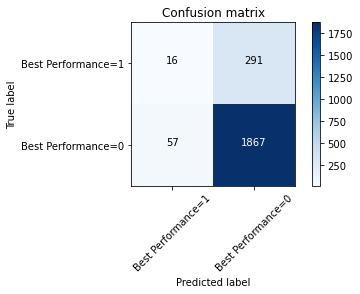

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred1.round(), labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Best Performance=1','Best Performance=0'],normalize= False,  title='Confusion matrix')

# **Confusion Matrix**

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
